In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
!pip install surprise

In [0]:
#Set your project path 
import os
project_path =  "/content/drive/My Drive/Colab Notebooks/"
os.chdir(project_path)

In [0]:
#import the reqired libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings; warnings.simplefilter('ignore')
%matplotlib inline

### 1. Read and explore the given dataset. 

In [0]:
# Import the dataset and give the column names
columns=['userId', 'productId', 'ratings','timestamp']
df=pd.read_csv('ratings_Electronics.csv',names=columns)

In [5]:
df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


##### Discard the timestamp column as in this case you may not need to use it.

In [0]:
df.drop('timestamp', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [0]:
df.shape

(7824482, 3)

In [0]:
df['ratings'].describe().transpose()

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: ratings, dtype: float64

###### Lets find the min and max Ratings

In [0]:
print("Minimun rating is: %d" %(df.ratings.min()))
print("Maximun rating is: %d" %(df.ratings.max()))

Minimun rating is: 1
Maximun rating is: 5


In [0]:
#Check for missing Values
print("Missing values across all columns: \n", df.isnull().sum())

Missing values across all columns: 
 userId       0
productId    0
ratings      0
dtype: int64


##### Check the Ratings data distribution

C:\Users\352659\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


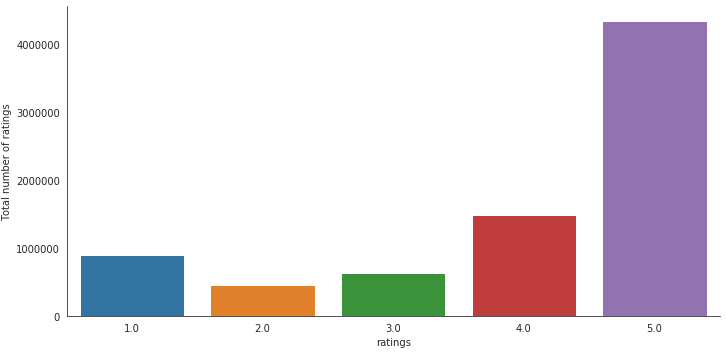

In [0]:
with sns.axes_style('white'):
    g = sns.factorplot('ratings', data=df, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")

From the above plot we can see that most of the users given Rating as 5

###### Lets find count of Unique data

In [0]:
print("Number of unique users:", len(np.unique(df['userId'])))
print("Number of unique Products:", len(np.unique(df['productId'])))

Number of unique users: 4201696
Number of unique Products: 476002


##### Lets find Most popular products based on Ratings count

In [0]:
popular_products = pd.DataFrame(df.groupby('productId')['ratings'].count())
most_popular = popular_products.sort_values('ratings', ascending=False)
most_popular.head(10)

,ratings
productId,
B0074BW614,18244
B00DR0PDNE,16454
B007WTAJTO,14172
B0019EHU8G,12285
B006GWO5WK,12226
B003ELYQGG,11617
B003ES5ZUU,10276
B007R5YDYA,9907
B00622AG6S,9823


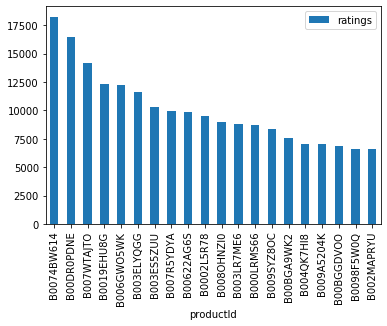

In [0]:
most_popular.head(20).plot(kind = 'bar')

##### Lets find most rated users

In [0]:
no_of_rated_products_per_user = pd.DataFrame(df.groupby('userId')['ratings'].count())
most_rated_user = no_of_rated_products_per_user.sort_values('ratings', ascending=False)
most_rated_user.head(10)

,ratings
userId,
A5JLAU2ARJ0BO,520
ADLVFFE4VBT8,501
A3OXHLG6DIBRW8,498
A6FIAB28IS79,431
A680RUE1FDO8B,406
A1ODOGXEYECQQ8,380
A36K2N527TXXJN,314
A2AY4YUOX2N1BQ,311
AWPODHOB4GFWL,308


In [0]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(most_rated_user['ratings'] >= 50)) )


 No of rated product more than 50 per user : 1540



### 2. Take a subset of the dataset to make it less sparse/ denser. (For example, keep the users only who has given 50 or more number of ratings.)

In [6]:
counts=df.userId.value_counts()
df1=df[df.userId.isin(counts[counts>=50].index)]
print('Number of users who have rated 50 or more items =', len(df1))
print('Number of unique users in the final data = ', len(np.unique(df1['userId'])))
print('Number of unique products in the final data = ', len(np.unique(df1['userId'])))

Number of users who have rated 50 or more items = 125871
Number of unique users in the final data =  1540
Number of unique products in the final data =  1540


In [8]:
df1.shape

(125871, 3)

In [0]:
df1.head()

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [0]:
#Average rating of the product 
df1.groupby('productId')['ratings'].mean().sort_values(ascending=False).head()

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: ratings, dtype: float64

In [0]:
#Total no of rating for product
df1.groupby('productId')['ratings'].count().sort_values(ascending=False).head()

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: ratings, dtype: int64

In [0]:
ratings_mean_count = pd.DataFrame(df1.groupby('productId')['ratings'].mean())

In [0]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df1.groupby('productId')['ratings'].count())

In [0]:
ratings_mean_count.head()  

,ratings,rating_counts
productId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [0]:
ratings_mean_count['rating_counts'].max()

206

<Figure size 576x432 with 0 Axes>

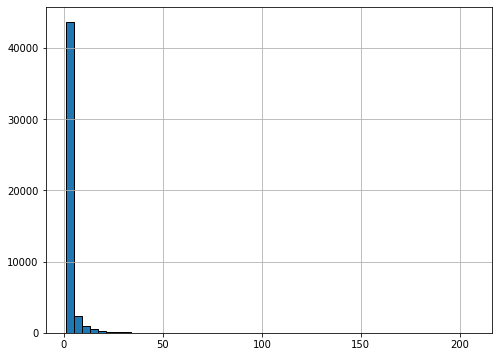

In [0]:
plt.figure(figsize=(8,6))
ratings_mean_count['rating_counts'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

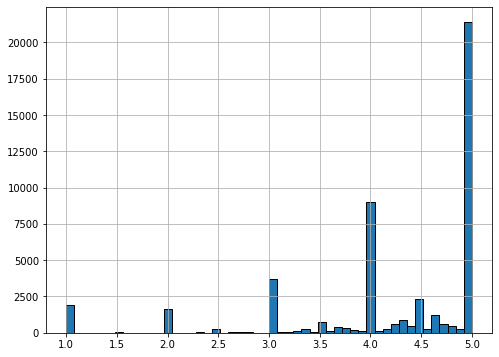

In [0]:
plt.figure(figsize=(8,6))
ratings_mean_count['ratings'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

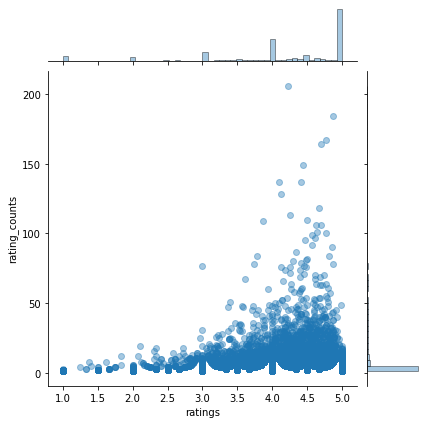

In [0]:
plt.figure(figsize=(8,6))
sns.jointplot(x='ratings', y='rating_counts', data=ratings_mean_count, alpha=0.4)

##### Calculate the density of the rating matrix

In [0]:
#constructing the pivot table
final_ratings_matrix = df1.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
final_ratings_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#final_ratings_matrix[(final_ratings_matrix.index == "A2CX7LUOHB2NDG")]
pd_pvt = final_ratings_matrix[(final_ratings_matrix.index.isin(['A2CX7LUOHB2NDG']))]
pd_pvt

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,


It shows that it is a sparse matrix. So, many cells are filled with 0 values.

In [0]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (1540, 48190)


In [0]:
#Calucating the density of the rating marix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  125871
possible_num_of_ratings =  74212600
density: 0.17%


#### 3. Split the data randomly into train and test dataset. (For example, split it in 70/30 ratio)

In [0]:
#Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(df1, test_size = 0.3, random_state=0)
train_data.head()

,userId,productId,ratings
6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0
4738241,AB094YABX21WQ,B0056XCEAA,1.0
4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0
3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0
1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0


In [0]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (88109, 3)
Shape of testing data:  (37762, 3)


#### 4. Build Popularity Recommender model.

In [0]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.head(40)

,productId,score
0,0594451647,1
1,0594481813,1
2,0970407998,1
3,0972683275,3
4,1400501466,4
5,1400501776,2
6,1400532620,1
7,1400532655,5
8,1400599997,5
9,1400698987,1


In [0]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,productId,score,rank
30847,B0088CJT4U,133,1.0
30287,B007WTAJTO,124,2.0
19647,B003ES5ZUU,122,3.0
8752,B000N99BBC,114,4.0
30555,B00829THK0,97,5.0


In [0]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [0]:
find_recom = [10,100,150]   
for i in find_recom:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

The list of recommendations for the userId: 10

       userId   productId  score  rank
30847      10  B0088CJT4U    133   1.0
30287      10  B007WTAJTO    124   2.0
19647      10  B003ES5ZUU    122   3.0
8752       10  B000N99BBC    114   4.0
30555      10  B00829THK0     97   5.0


The list of recommendations for the userId: 100

       userId   productId  score  rank
30847     100  B0088CJT4U    133   1.0
30287     100  B007WTAJTO    124   2.0
19647     100  B003ES5ZUU    122   3.0
8752      100  B000N99BBC    114   4.0
30555     100  B00829THK0     97   5.0


The list of recommendations for the userId: 150

       userId   productId  score  rank
30847     150  B0088CJT4U    133   1.0
30287     150  B007WTAJTO    124   2.0
19647     150  B003ES5ZUU    122   3.0
8752      150  B000N99BBC    114   4.0
30555     150  B00829THK0     97   5.0




Since, it is a Popularity recommender model, so, all the three users are given the same recommendations. Here, we predict the products based on the popularity. It is not personalized to particular user. It is a non-personalized recommender system.

#### 5. Build Collaborative Filtering model.

In [0]:
df_CF = pd.concat([train_data, test_data]).reset_index()
df_CF.head()

,index,userId,productId,ratings
0,6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0
1,4738241,AB094YABX21WQ,B0056XCEAA,1.0
2,4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0
3,3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0
4,1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0


In [0]:
# User based Collaborative Filtering model
# Matrix with row per 'user' and column per 'product' 
pivot_df = df_CF.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
print('Shape of the pivot table: ', pivot_df.shape)

Shape of the pivot table:  (1540, 48190)


In [0]:
#define user index from 0 to 1539
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,user_index
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [0]:
pivot_df.tail()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,user_index
userId,,,,,,,,,,,,,,,,,,,,,
AZBXKUH4AIW3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1535
AZCE11PSTCH1L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1536
AZMY6E8B52L2T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1537
AZNUHQSHZHSUE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1538
AZOK5STV85FBJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1539


In [0]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As this is a sparse matrix we will use SVD.

In [0]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [0]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [[ 0.00899214  0.00598943 -0.01133778 ... -0.02098223 -0.03450332
  -0.02112691]
 [ 0.0078874   0.01984352 -0.00397075 ... -0.01076097  0.02009915
  -0.03863719]
 [ 0.00060497 -0.00421198 -0.00381018 ...  0.02924332  0.03319807
  -0.03354122]
 ...
 [-0.0069631   0.0863053   0.02353607 ... -0.01332978 -0.1613707
  -0.05949368]
 [-0.00238725  0.0032176  -0.00374118 ... -0.00677598  0.00445708
  -0.01348483]
 [-0.00097386  0.00410379  0.002161   ... -0.01215862 -0.00249329
  -0.00561029]]


In [0]:
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[ 87.43474122   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          88.68897677   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.          91.15027972   0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.          92.15989229   0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.          95.03789667
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   98.21626326   0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.         100.38232831   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.      

In [0]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [[-2.31966546e-04 -4.68044406e-04 -1.43854010e-04 ...  2.30584720e-02
   8.19034231e-03  1.83182807e-03]
 [-1.20917225e-04 -5.52580088e-04  3.34185097e-04 ... -2.44735821e-02
  -4.79762018e-04 -1.00226998e-03]
 [ 2.66495818e-04  1.86012492e-04 -4.76652015e-04 ...  9.93151909e-03
   2.54217806e-03 -4.78476864e-04]
 ...
 [-8.81590303e-04 -1.31370545e-03 -4.21874643e-04 ...  1.37986535e-02
   4.52761832e-03 -1.09691626e-03]
 [-4.58579287e-05 -1.88881713e-04 -9.00497985e-05 ... -3.32629345e-02
  -1.31262740e-02 -2.24988359e-03]
 [-2.02226218e-04 -2.59177123e-04 -6.62049181e-04 ... -1.02695130e-02
  -3.76431121e-03 -8.69030592e-04]]


In [0]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.002661,0.003576,0.004050,0.006906,0.003967,0.003073,0.005782,0.000568,0.014386,0.002708,...,6.108890e-04,0.044224,0.002919,0.060347,-0.002137,0.006751,0.001525,0.130951,0.059243,0.015014
1,0.002262,0.002505,0.005136,0.016517,0.007120,0.001438,0.013258,0.000335,-0.003781,0.001190,...,2.024793e-04,0.029213,0.000010,0.000244,-0.003111,-0.000621,0.004409,-0.039241,-0.006889,0.003696
2,-0.001600,-0.002502,0.002186,0.016742,0.006716,-0.002113,0.005805,0.003497,-0.005009,-0.001588,...,-3.240446e-04,0.009180,-0.002459,-0.016922,0.019936,-0.002483,-0.000155,-0.002889,-0.011522,-0.004525
3,0.002732,0.003867,0.001799,0.009395,0.004075,0.002778,0.003507,0.000095,0.007983,0.002381,...,6.031462e-04,-0.003369,0.003433,-0.003428,-0.000750,0.000119,0.002612,-0.015107,-0.006740,0.003276
4,0.000704,0.000085,0.002051,0.009664,0.004438,0.000335,0.005992,0.001056,-0.000369,0.000373,...,3.745108e-08,-0.001140,-0.000323,-0.025215,0.004700,-0.002170,0.001263,-0.048555,-0.016301,-0.003377


In [0]:
# Recommend the products with the highest predicted ratings

def recommend_products(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Products'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended products for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [0]:
userID = 200
num_recommendations = 5
recommend_products(userID, pivot_df, preds_df, num_recommendations)  


Below are the recommended products for user(user_id = 200):

                      user_ratings  user_predictions
Recommended Products                                
B0079UAT0A                     0.0          1.321825
B004CLYEFK                     0.0          1.044018
B007WTAJTO                     0.0          0.999079
B008ULPE70                     0.0          0.962866
B008X9Z528                     0.0          0.945024


In [0]:
userID = 400
num_recommendations = 5
recommend_products(userID, pivot_df, preds_df, num_recommendations)  


Below are the recommended products for user(user_id = 400):

                      user_ratings  user_predictions
Recommended Products                                
B000N99BBC                     0.0          1.369806
B0088CJT4U                     0.0          1.357358
B002V88HFE                     0.0          1.090390
B00829THK0                     0.0          1.080537
B001TH7GUU                     0.0          1.065383


In [0]:
userID = 8
num_recommendations = 5
recommend_products(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended products for user(user_id = 8):

                      user_ratings  user_predictions
Recommended Products                                
B003ES5ZUU                     0.0          1.919363
B002V88HFE                     0.0          1.430753
B002WE6D44                     0.0          1.258002
B001TH7GUU                     0.0          1.249597
B005HMKKH4                     0.0          0.976093


Since, it is a Collaborative recommender model, so, all the three users are given different recommendations based on users past behaviour.

#### 6. Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)

In [0]:
# Actual ratings given by the users
final_ratings_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

productId
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [0]:
# Predicted ratings 
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.002661,0.003576,0.004050,0.006906,0.003967,0.003073,0.005782,0.000568,0.014386,0.002708,...,6.108890e-04,0.044224,0.002919,0.060347,-0.002137,0.006751,0.001525,0.130951,0.059243,0.015014
1,0.002262,0.002505,0.005136,0.016517,0.007120,0.001438,0.013258,0.000335,-0.003781,0.001190,...,2.024793e-04,0.029213,0.000010,0.000244,-0.003111,-0.000621,0.004409,-0.039241,-0.006889,0.003696
2,-0.001600,-0.002502,0.002186,0.016742,0.006716,-0.002113,0.005805,0.003497,-0.005009,-0.001588,...,-3.240446e-04,0.009180,-0.002459,-0.016922,0.019936,-0.002483,-0.000155,-0.002889,-0.011522,-0.004525
3,0.002732,0.003867,0.001799,0.009395,0.004075,0.002778,0.003507,0.000095,0.007983,0.002381,...,6.031462e-04,-0.003369,0.003433,-0.003428,-0.000750,0.000119,0.002612,-0.015107,-0.006740,0.003276
4,0.000704,0.000085,0.002051,0.009664,0.004438,0.000335,0.005992,0.001056,-0.000369,0.000373,...,3.745108e-08,-0.001140,-0.000323,-0.025215,0.004700,-0.002170,0.001263,-0.048555,-0.016301,-0.003377


In [0]:
# Average PREDICTED rating for each item
preds_df.mean().head()

productId
0594451647    0.001542
0594481813    0.002341
0970407998    0.002597
0972683275    0.011807
1400501466    0.004848
dtype: float64

In [0]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
0594451647,0.003247,0.001542,0
0594481813,0.001948,0.002341,1
0970407998,0.003247,0.002597,2
0972683275,0.012338,0.011807,3
1400501466,0.012987,0.004848,4


In [0]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.0033 



#### 7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [0]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 20
num_recommendations = 5
recommend_products(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended products for user(user_id = 20):

                      user_ratings  user_predictions
Recommended Products                                
B0088CJT4U                     0.0          1.524522
B00829TIEK                     0.0          1.335672
B000N99BBC                     0.0          1.262374
B008DWCRQW                     0.0          1.062069
B004CLYEDC                     0.0          1.014894


#### 8. Summarize your insights.

* The Popularity-based recommender system is a non-personalised recommender system and these are based on frequecy counts, which may be not suitable to the user.We can see the differance above for the user id 200, 400 & 8, The Popularity based model has recommended the same set of 5 products to all users but Collaborative Filtering based model has recommended entire different list based on the user past purchase history.


* Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.

#### user-user Collaborative Filtering model

In [0]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

In [0]:
reader = Reader(rating_scale=(1, 5))

In [0]:
data = Dataset.load_from_df(df1[['userId', 'productId', 'ratings']], reader)

In [0]:
trainset, testset = train_test_split(data, test_size=.30)

In [0]:
df1 = None

In [0]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [0]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [0]:
test_pred

[Prediction(uid='A1GBT4UN2RW7XY', iid='B001RPJEYA', r_ui=5.0, est=4.261846122416552, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AHNHLGKIZ2N3B', iid='B00127VF68', r_ui=4.0, est=3.0625, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A2UKE7GIVC7XFW', iid='B007F5LYVM', r_ui=3.0, est=3.372541366624817, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='A1NNMOD9H36Q8E', iid='B000PEF254', r_ui=5.0, est=3.9846153846153847, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A259MPG6SOL02P', iid='B000IZE8XM', r_ui=5.0, est=3.3908045977011496, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2CPP7BZKOF9TP', iid='B002PXC4YU', r_ui=5.0, est=4.261846122416552, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3AYSYSLHU26U9', iid='B00BZ7L9D4', r_ui=4.0, est=4.261846122416552, details={'was_impossible': True, 'reason': 'User and/or ite

In [0]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0579


1.057878744116481

#### item-item Collaborative Filtering model

In [11]:
df2=df1.iloc[:80000,0:]
df2.shape

(80000, 3)

In [0]:
data1 = Dataset.load_from_df(df2[['userId', 'productId', 'ratings']], reader)
trainset1, testset1 = train_test_split(data1, test_size=.30)

In [14]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo1 = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo1.fit(trainset1)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [16]:
# run the trained model against the testset
test_pred1 = algo1.test(testset1)
test_pred1

[Prediction(uid='A9J4UURM4OSDW', iid='B000V5P90K', r_ui=5.0, est=4.8, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AV10H5K6VPQIJ', iid='B000JNG45I', r_ui=2.0, est=3.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2PB325LKXYDOL', iid='B00109Y2DQ', r_ui=5.0, est=4.366666666666666, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AAXAKFQEAQPWC', iid='B003RRY8ZG', r_ui=5.0, est=2.3333333333333335, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3NEAETOSXDBOM', iid='B002WN30IM', r_ui=4.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ACP9S40H3SHY1', iid='B000BIVCP8', r_ui=5.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3EZEP0FX5BC1P', iid='B00004SB92', r_ui=5.0, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A359MYLPLEOF7N', iid='B003BYRGJU', r_ui=5.0, est=4.333333333333333, details={'actual_k': 0, 'was_impossi

In [17]:
print("User-based Model : Test Set")
accuracy.rmse(test_pred1, verbose=True)

User-based Model : Test Set
RMSE: 1.1769


1.1769281619831518